# Maximum Product Subarray

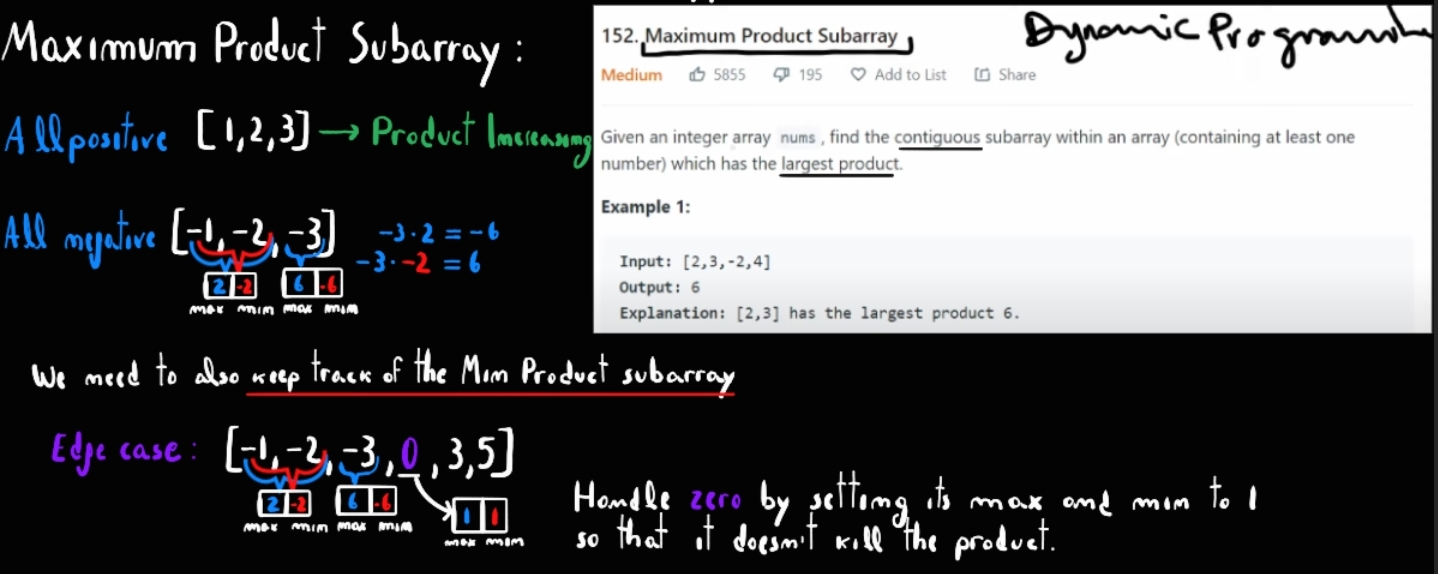

In [ ]:
from typing import List


class Solution:
    def max_product(self, nums: List[int]) -> int:
        # initialize to the max of the array because
        # we will never get a lower value
        res = max(nums)
        curr_min, curr_max = 1, 1
        for n in nums:
            # temp because we want the old curr_max (or curr_min)
            # to calculate the curr_min or (curr_max), depending
            # on which one we compute first
            temp = curr_min
            # using 'n' as the third argument deals with the
            # zero edge case
            curr_min = min(curr_min * n, curr_max * n, n)
            curr_max = max(curr_max * n, temp * n, n)
        return max(res, curr_max)


sol = Solution()
sol.max_product([1, 2, 0, 3])

# Coin Change

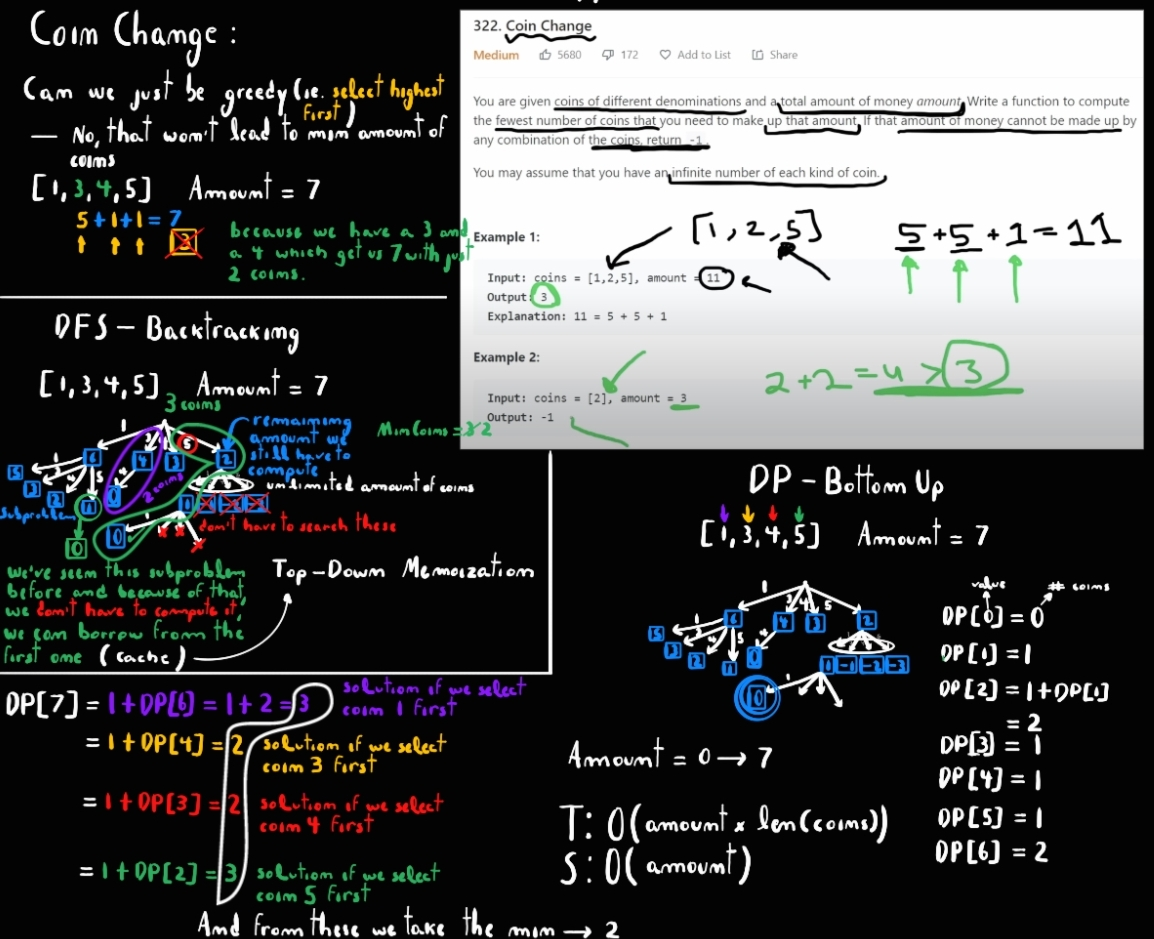

In [ ]:
from typing import List


class Solution:
    def coin_change(self, coins: List[int], amount: int) -> int:
        # we initialize every position to amount + 1 as this is a max value
        # could also use math infinity or max integer
        dp = [amount + 1] * (amount + 1)
        # base case (to compute amount 0, it takes 0 coins)
        dp[0] = 0
        # now we compute the other amounts up to and including 'amount'
        for a in range(1, amount + 1):
            for c in coins:
                # we are trying to compute this a amount
                # the condition tells us we can keep on
                # searching or we've got there (if zero)
                if a - c >= 0:
                    # the 1 is the c coin, dp[a - c]
                    dp[a] = min(dp[a] + 1 + dp[a - c])
        # we return if dp[amount]
        return dp[amount] if dp[amount] != amount + 1 else -1

# Add Two Numbers

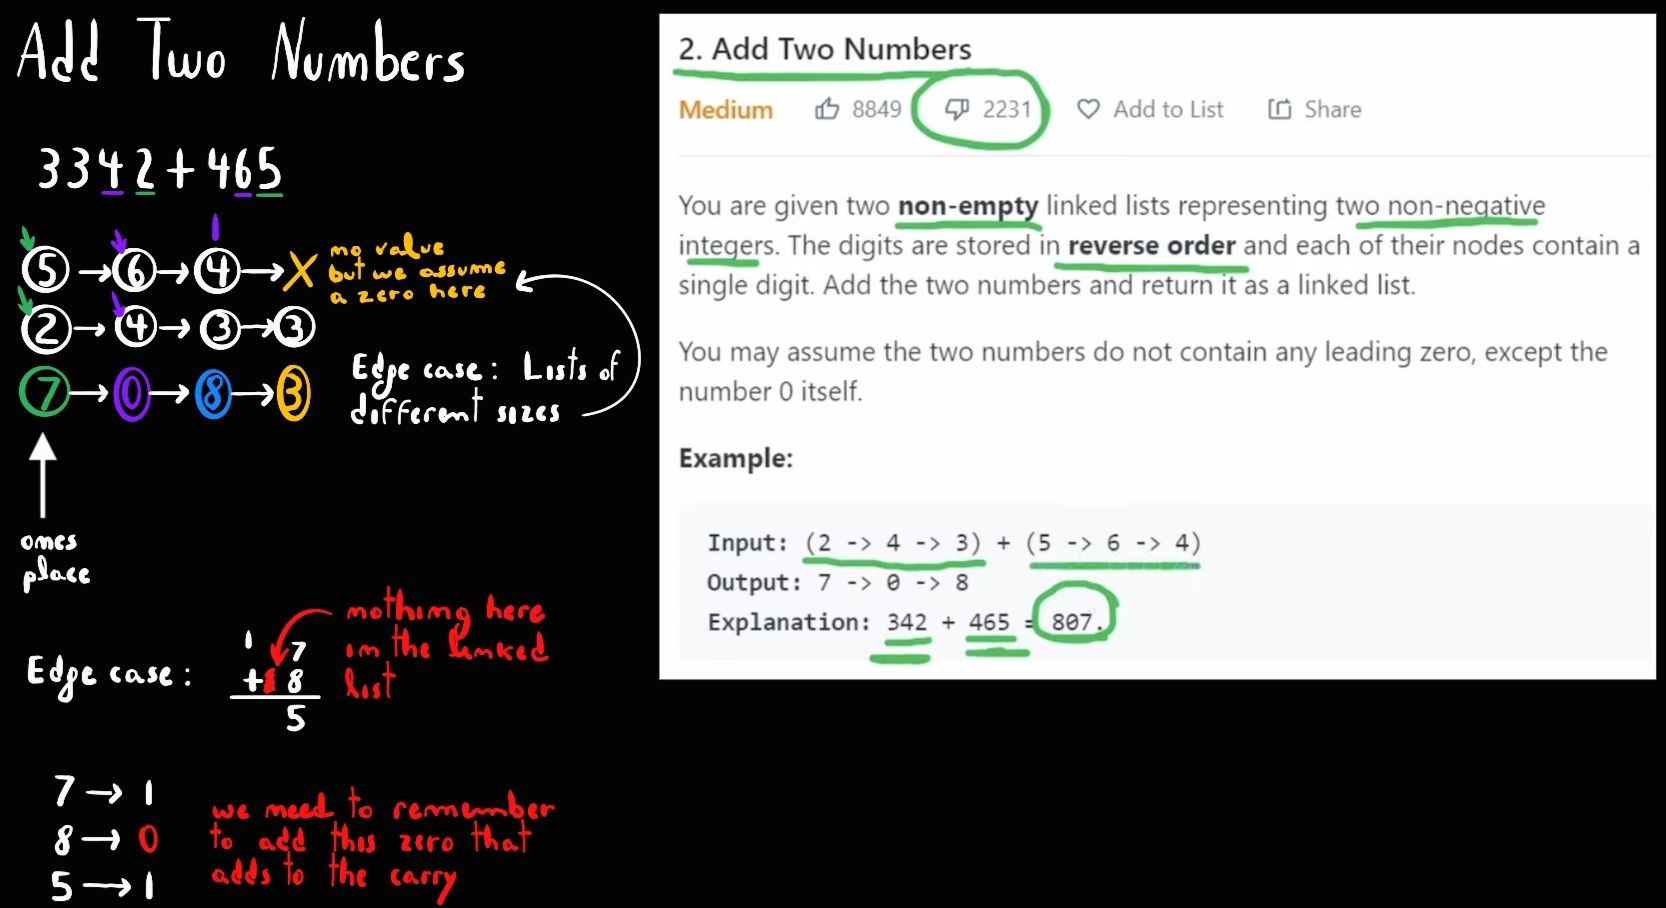

In [9]:
from typing import List


# Definition for singly linked list
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def visualize(self):
        nodes = []
        cur = self
        while cur:
            nodes.append(str(cur.val))
            cur = cur.next
        return " -> ".join(nodes) + " -> None"


class Solution:
    def add_two_numbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        # somehow this dummy prevents having to deal with the
        # edge cases of inserting into a linked list
        dummy = ListNode()
        cur = dummy
        # carry initializes to zero to deal with the different sizes edge case
        carry = 0
        # or carry deals with the 7+8 edge case because l1 and l2 would be null
        # hence v1 and v2 would be 0 and the loop would stop, leaving the carry
        while l1 or l2 or carry:
            v1 = l1.val if l1 else 0
            v2 = l2.val if l2 else 0
            # new digit
            val = v1 + v2 + carry
            # imagine 'val' is 15 for example - a 2 digit number
            # we need to get the carry out of that
            carry = val // 10
            # and this will give us the ones place
            val = val % 10
            cur.next = ListNode(val)
            # update pointers
            cur = cur.next
            l1 = l1.next if l1 else None
            l2 = l2.next if l2 else None
        return dummy.next


sol = Solution()
sol.add_two_numbers(ListNode(243), ListNode(564)).visualize()

'7 -> 0 -> 8 -> None'